done with rho plot in  84.5910313129425  seconds
done with rho plot in  73.8209776878357  seconds
done with rho plot in  82.80424547195435  seconds
done with rho plot in  75.35695934295654  seconds


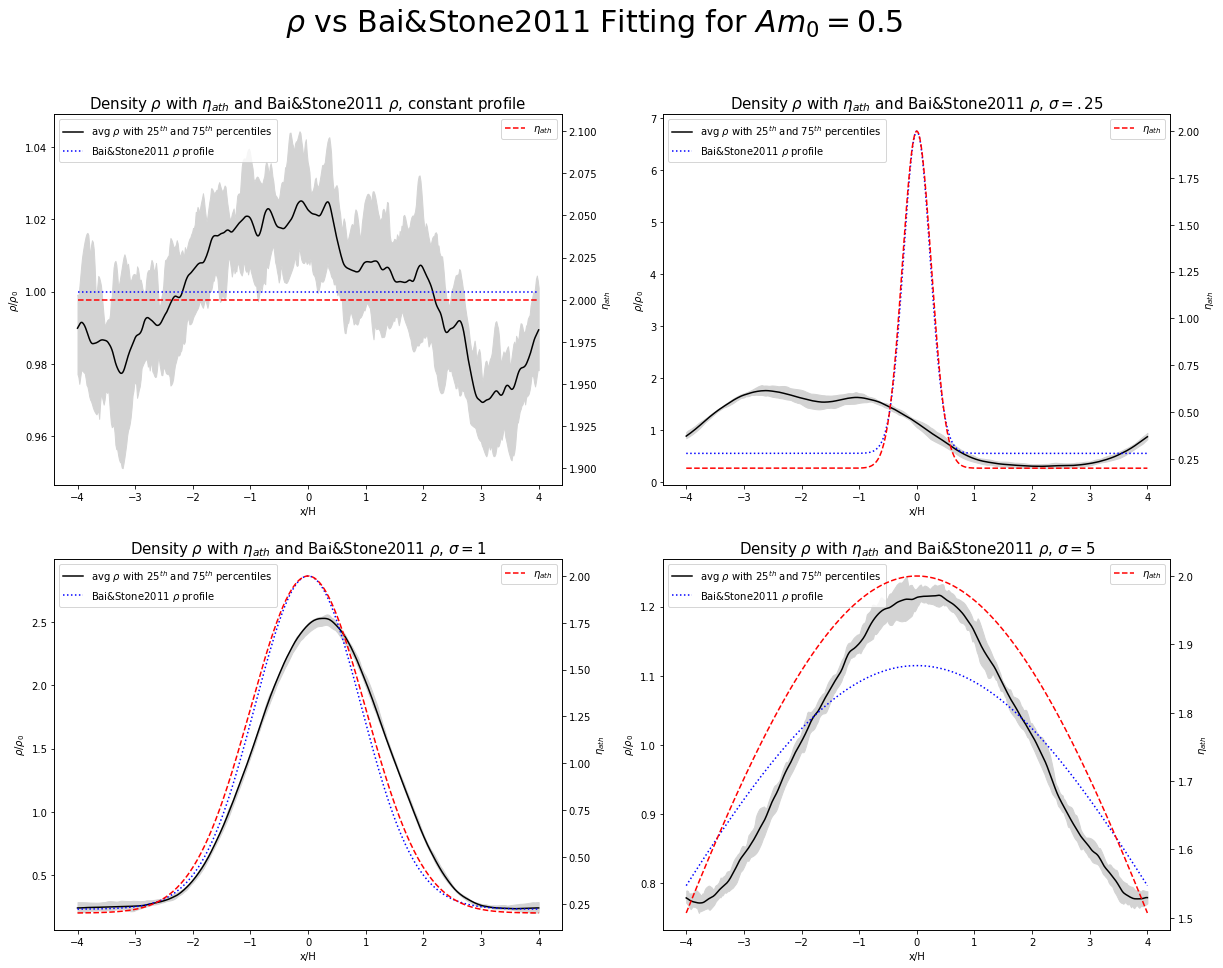

done


In [23]:
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
#small method for reading parameters from file path
def read_filename(file_path):
    sgn = 1
    amp = 1
    sig = 1
    eta = 1
    if 'sig_point25' in file_path:
        sig = .25
    if 'sig_1' in file_path:
        sig = 1
    if 'sig_5' in file_path:
        sig = 5
    if 'inv'in file_path:
        sgn = -1
    if 'amp_point5'in file_path:
        amp = .5
        eta = 1/amp
    if 'amp_1' in file_path:
        amp = 1
        eta = 1/amp
    if 'amp_5' in file_path:
        amp = 5
        eta = 1/amp
    if 'const' in file_path:
        sig = 'flat'
    return amp,eta,sig,sgn
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,ax = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = '$\\rho$ vs Bai&Stone2011 Fitting for $Am_0 = 0.5$'
fig1.suptitle(sptitle,fontsize=30)

def zeroth_order_plot(file_list):
    #requires list in the format [const, 0.25,1,5] for sigma values
    #create the secondary axes for eta_ath overlay
    file0 = file_list[0]
    file1 = file_list[1]
    file2 = file_list[2]
    file3 = file_list[3]
    ax0=ax[0,0].twinx()
    ax0.set_ylabel('$\\eta_{ath}$')
    ax1=ax[0,1].twinx()
    ax1.set_ylabel('$\\eta_{ath}$')
    ax2=ax[1,0].twinx()
    ax2.set_ylabel('$\\eta_{ath}$')
    ax3=ax[1,1].twinx()
    ax3.set_ylabel('$\\eta_{ath}$')
    
    #constant section----------------------------------------------------------------------------------------------------------
    amp0,eta0,sig0,sgn0 = read_filename(file0)
    rho_time = time.time()
    prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file0)
    ax[0,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[0,0].fill_between(x_arr,lower_rho,upper_rho,color ='lightgrey')

    ax[0,0].set_xlabel('x/H')
    ax[0,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$ with $\\eta_{ath}$ and Bai&Stone2011 $\\rho$, constant profile'
    ax[0,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    #overlay eta_ath
    if sgn0 == -1:
        if sig0 == 'flat':
            y_array = eta0 * (x_arr**0) #force to have same length as x arr
        else:    
            y_array = eta0*(1-.9*np.exp(-(x_arr**2)/(2*(sig0**2)))) 
    if sgn0 == 1:
        if sig0 == 'flat':
            y_array = eta0 * (x_arr**0) #force to have same length as x arr
        else: 
            y_array = eta0*(.9*np.exp(-(x_arr**2)/(2*(sig0**2)))+.1) 
    ax0.plot(x_arr,y_array,'r--',label = '$\\eta_{ath}$' )
    ax0.legend(loc='upper right')
    #claculate and overlay baistone2011
    #approximate local beta_avg to beta_min as given in eqn 25
    beta_min_arr = np.sqrt((50*y_array**1.2)**2+(8*y_array**.3+1)**2)
    ana_rho_arr = (2*beta_min_arr)
    norm_factor = np.average(ana_rho_arr)
    #normalise so avg density is still 1
    ax[0,0].plot(x_arr,ana_rho_arr/norm_factor,'b:',label='Bai&Stone2011 $\\rho$ profile')
    ax[0,0].legend(loc='upper left')
    #sigma = .25 section--------------------------------------------------------------------------------------------------------------
    amp1,eta1,sig1,sgn1 = read_filename(file1)
    rho_time = time.time()
    prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file1)
    ax[0,1].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[0,1].fill_between(x_arr,lower_rho,upper_rho,color ='lightgrey')
 
    ax[0,1].set_xlabel('x/H')
    ax[0,1].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$ with $\\eta_{ath}$ and Bai&Stone2011 $\\rho$, $\\sigma=.25$'
    ax[0,1].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    #overlay eta_ath
    if sgn1 == -1:
        if sig1 == 'flat':
            y_array = eta1 * (x_arr**0) #force to have same length as x arr
        else:    
            y_array = eta1*(1-.9*np.exp(-(x_arr**2)/(2*(sig1**2)))) 
    if sgn1 == 1:
        if sig1 == 'flat':
            y_array = eta1 * (x_arr**0) #force to have same length as x arr
        else: 
            y_array = eta1*(.9*np.exp(-(x_arr**2)/(2*(sig1**2)))+.1) 
    ax1.plot(x_arr,y_array,'r--',label = '$\\eta_{ath}$' )
    ax1.legend(loc='upper right')
    #claculate and overlay baistone2011
    #approximate local beta_avg to beta_min as given in eqn 25
    beta_min_arr = np.sqrt((50*y_array**1.2)**2+(8*y_array**.3+1)**2)
    ana_rho_arr = (2*beta_min_arr)
    norm_factor = np.average(ana_rho_arr)
    #normalize so that avg density is 1
    
    ax[0,1].plot(x_arr,ana_rho_arr/norm_factor,'b:',label='Bai&Stone2011 $\\rho$ profile') 
    ax[0,1].legend(loc='upper left')

    #sig = 1 case-----------------------------------------------------------------------
    amp2,eta2,sig2,sgn2 = read_filename(file2)
    rho_time = time.time()
    prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file2)
    ax[1,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[1,0].fill_between(x_arr,lower_rho,upper_rho,color ='lightgrey')
 
    ax[1,0].set_xlabel('x/H')
    ax[1,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$ with $\\eta_{ath}$ and Bai&Stone2011 $\\rho$, $\\sigma=1$'
    ax[1,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    #overlay eta_ath
    if sgn2 == -1:
        if sig2 == 'flat':
            y_array = eta2 * (x_arr**0) #force to have same length as x arr
        else:    
            y_array = eta2*(1-.9*np.exp(-(x_arr**2)/(2*(sig2**2)))) 
    if sgn2 == 1:
        if sig2 == 'flat':
            y_array = eta2 * (x_arr**0) #force to have same length as x arr
        else: 
            y_array = eta2*(.9*np.exp(-(x_arr**2)/(2*(sig2**2)))+.1) 
    ax2.plot(x_arr,y_array,'r--',label = '$\\eta_{ath}$' )
    ax2.legend(loc='upper right')
    #claculate and overlay baistone2011
    #approximate local beta_avg to beta_min as given in eqn 25
    beta_min_arr = np.sqrt((50*y_array**1.2)**2+(8*y_array**.3+1)**2)
    ana_rho_arr = (2*beta_min_arr)
    norm_factor = np.average(ana_rho_arr)
    ax[1,0].plot(x_arr,ana_rho_arr/norm_factor,'b:',label='Bai&Stone2011 $\\rho$ profile') 
    ax[1,0].legend(loc='upper left')
#sig=5 case--------------------------------------------------------------------------------------
    amp3,eta3,sig3,sgn3 = read_filename(file3)
    rho_time = time.time()
    prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file3)
    ax[1,1].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[1,1].fill_between(x_arr,lower_rho,upper_rho,color ='lightgrey')
 
    ax[1,1].set_xlabel('x/H')
    ax[1,1].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$ with $\\eta_{ath}$ and Bai&Stone2011 $\\rho$, $\\sigma=5$'
    ax[1,1].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    #overlay eta_ath
    if sgn3 == -1:
        if sig3 == 'flat':
            y_array = eta3 * (x_arr**0) #force to have same length as x arr
        else:    
            y_array = eta3*(1-.9*np.exp(-(x_arr**2)/(2*(sig3**2)))) 
    if sgn3 == 1:
        if sig3 == 'flat':
            y_array = eta3 * (x_arr**0) #force to have same length as x arr
        else: 
            y_array = eta3*(.9*np.exp(-(x_arr**2)/(2*(sig3**2)))+.1) 
    ax3.plot(x_arr,y_array,'r--',label = '$\\eta_{ath}$' )
    ax3.legend(loc='upper right')
    #claculate and overlay baistone2011
    #approximate local beta_avg to beta_min as given in eqn 25
    beta_min_arr = np.sqrt((50*y_array**1.2)**2+(8*y_array**.3+1)**2)
    ana_rho_arr = (2*beta_min_arr)
    norm_factor = np.average(ana_rho_arr)
    ax[1,1].plot(x_arr,ana_rho_arr/norm_factor,'b:',label='Bai&Stone2011 $\\rho$ profile') 
    ax[1,1].legend(loc='upper left')
        
    
    plt.show()    
    return('done')






file_list = [
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5" 
]
print(zeroth_order_plot(file_list))

fig1.savefig('./thesis_images/zeroth_order_point5.pdf')


done with rho plot in  102.02730369567871  seconds
done with rho plot in  88.66507506370544  seconds
done with rho plot in  83.68663191795349  seconds
done with rho plot in  73.70177698135376  seconds


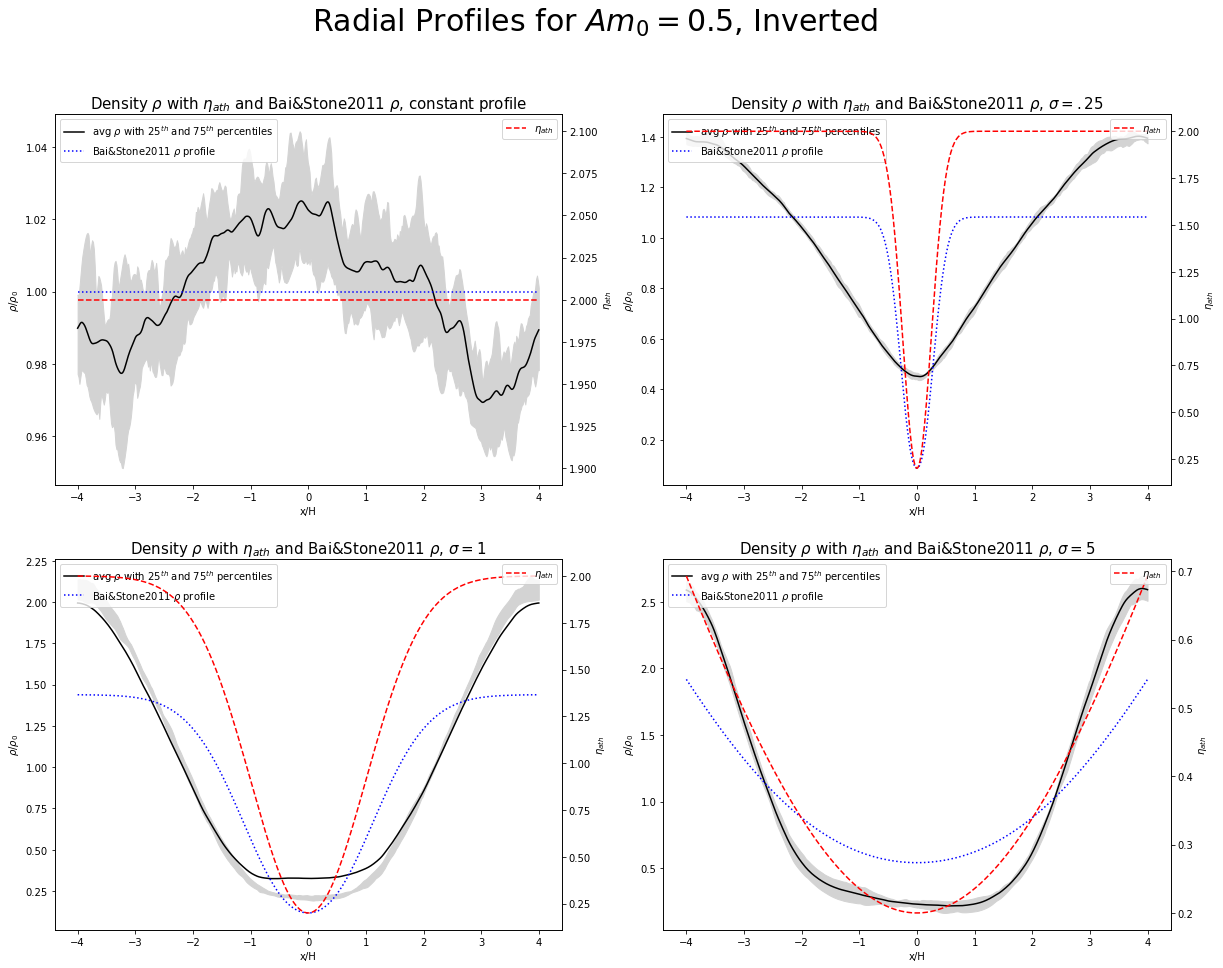

done


In [24]:
file_list = [
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5" 
]


#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,ax = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 0.5$, Inverted'
fig1.suptitle(sptitle,fontsize=30)
start=time.time()
x_arr = np.linspace(-4,4,512)


print(zeroth_order_plot(file_list))
fig1.savefig('./thesis_images/zeroth_order_point5_inverted.pdf')